In [18]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

import tarfile, json
from pathlib import Path

In [23]:
def get_model_info(mp: Path) -> pl.DataFrame:
    with tarfile.open(mp, 'r') as f:
        config = json.load(f.extractfile('config.json'))
        fp = config['fingerprints']
        df = (
            pl.read_csv(f.extractfile('info.csv').read())
            .with_columns([
                pl.Series('bit_size', [fp['bitSize']]),
                pl.Series('radius', [fp['radius']]),
                pl.Series('use_features', [fp['useFeatures']]),
                pl.Series('use_chirality', [fp['useChirality']]),
                pl.Series('activities', [", ".join(config['activityTypes'])]),
                pl.Series('opt_rounds', [config['optRounds']])
            ])
        )
        
    return df

def combine_model_infos(model_dir: Path) -> pl.DataFrame:
    return pl.concat(get_model_info(mp) for mp in model_dir.glob('*.tar.gz'))
        
            

In [51]:
base = Path('../test')
data = combine_model_infos(base)


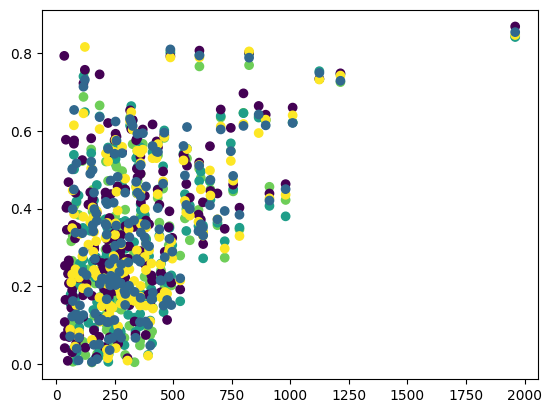

In [50]:
subset = data.filter(pl.col('r2') > 0.0)

fig, axs = plt.subplots(3, 2)
ax.scatter(subset['num_compounds'], subset['r2'], c=subset['radius'])

plt.show()

In [54]:
data.write_csv('perf-all-models.csv')